https://drive.google.com/file/d/1wkQDfUIBwY4SO5mC1JAua9d6JBa1sCcd/view?usp=sharing

In [ ]:
! gdown 1wkQDfUIBwY4SO5mC1JAua9d6JBa1sCcd

Downloading...
From: https://drive.google.com/uc?id=1wkQDfUIBwY4SO5mC1JAua9d6JBa1sCcd
To: /content/train_dataset_train.csv
100% 50.5M/50.5M [00:00<00:00, 116MB/s]


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import f1_score

In [ ]:
import numpy as np
import pandas as pd
import torch
# import transformers
from tqdm import notebook
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
import re, string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
df = pd.read_csv('/content/train_dataset_train.csv')

In [ ]:
df.head()

,id,name,groups
0,1034,ШОК-ЦЕНА Пена д/душа/бритья КУППЕР 200 мл АКС,10
1,1035,Мин.вода Нагутская №26 0.5л,0
2,1036,Пельмени Домашние вес ПО Прямицино.,10
3,1037,ПЕЧЕНЬЕ ОВСЯНО-ГРЕЧНЕВОЕ ЭКО БОТ 4600508719365,10
4,1038,Спред растительно-жировой Масляничка 62% 170г ...,10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658064 entries, 0 to 658063
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      658064 non-null  int64 
 1   name    658064 non-null  object
 2   groups  658064 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 15.1+ MB


In [ ]:
df.isna().sum()

id        0
name      0
groups    0
dtype: int64

In [ ]:
# Функция для очистки текста 
def clean_text(text):
  text = text.lower()
  return " ".join(re.sub(r"[^а-яa-z]", ' ', text).split()) 
 
# создаем список для хранения преобразованных данных 
processed_text = []
# загружаем стоп-слова для английского языка
stop_words = stopwords.words('russian')
# инициализируем лемматайзер 
lemmatizer = WordNetLemmatizer()
 
# для каждого сообщения text из столбца data['Message']
for text in df['name']:
    # cleaning 
    text = clean_text(text)   
    # tokenization
    text = word_tokenize(text)       
    # удаление стоп-слов
    text = [word for word in text if word not in stop_words]
   
    # лемматизация
    text = [lemmatizer.lemmatize(w) for w in text]

    text = [word for word in text if len(word) >= 3]       #исключить короткие слова и символы  
    
    # добавляем преобразованный текст в список processed_text
    processed_text.append(text)
 
# Сохраняем результат преобразования в новой колонке 'Processed_msg'


In [ ]:
df['lemm_text'] = processed_text

In [ ]:
df

,id,name,groups,lemm_text,lemm_text_str
0,1034,ШОК-ЦЕНА Пена д/душа/бритья КУППЕР 200 мл АКС,10,"[шок, цена, пена, душа, бритья, куппер, акс]",шок цена пена д душа бритья куппер мл акс
1,1035,Мин.вода Нагутская №26 0.5л,0,"[мин, вода, нагутская]",мин вода нагутская л
2,1036,Пельмени Домашние вес ПО Прямицино.,10,"[пельмени, домашние, вес, прямицино]",пельмени домашние вес прямицино
3,1037,ПЕЧЕНЬЕ ОВСЯНО-ГРЕЧНЕВОЕ ЭКО БОТ 4600508719365,10,"[печенье, овсяно, гречневое, эко, бот]",печенье овсяно гречневое эко бот
4,1038,Спред растительно-жировой Масляничка 62% 170г ...,10,"[спред, растительно, жировой, масляничка, змж]",спред растительно жировой масляничка г змж
...,...,...,...,...,...
658059,659093,"КАРАЧИНСКАЯ 1,5 л *6 шт мин вода",0,"[карачинская, мин, вода]",карачинская л шт мин вода
658060,659094,Хлеб ДОНСКОЙ 350г Рузский х/з,9,"[хлеб, донской, рузский]",хлеб донской г рузский х з
658061,659095,Печенье сахарное FORSITE Сэндвич с шоколадно-с...,6,"[печенье, сахарное, forsite, сэндвич, шоколадн...",печенье сахарное forsite сэндвич шоколадно сли...
658062,659096,"Хлеб Бабушкин подов пшен 0,55кг п/уп(ШХЗ)",9,"[хлеб, бабушкин, подов, пшен, шхз]",хлеб бабушкин подов пшен кг п уп шхз


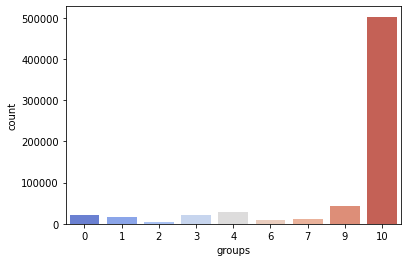

In [ ]:
sns.countplot(x='groups', data=df, palette='coolwarm');

In [ ]:
df['lemm_text_str'] = df['lemm_text'].apply(lambda x: ' '.join(x))

In [ ]:
df

,id,name,groups,lemm_text,lemm_text_str
0,1034,ШОК-ЦЕНА Пена д/душа/бритья КУППЕР 200 мл АКС,10,"[шок, цена, пена, душа, бритья, куппер, акс]",шок цена пена душа бритья куппер акс
1,1035,Мин.вода Нагутская №26 0.5л,0,"[мин, вода, нагутская]",мин вода нагутская
2,1036,Пельмени Домашние вес ПО Прямицино.,10,"[пельмени, домашние, вес, прямицино]",пельмени домашние вес прямицино
3,1037,ПЕЧЕНЬЕ ОВСЯНО-ГРЕЧНЕВОЕ ЭКО БОТ 4600508719365,10,"[печенье, овсяно, гречневое, эко, бот]",печенье овсяно гречневое эко бот
4,1038,Спред растительно-жировой Масляничка 62% 170г ...,10,"[спред, растительно, жировой, масляничка, змж]",спред растительно жировой масляничка змж
...,...,...,...,...,...
658059,659093,"КАРАЧИНСКАЯ 1,5 л *6 шт мин вода",0,"[карачинская, мин, вода]",карачинская мин вода
658060,659094,Хлеб ДОНСКОЙ 350г Рузский х/з,9,"[хлеб, донской, рузский]",хлеб донской рузский
658061,659095,Печенье сахарное FORSITE Сэндвич с шоколадно-с...,6,"[печенье, сахарное, forsite, сэндвич, шоколадн...",печенье сахарное forsite сэндвич шоколадно сли...
658062,659096,"Хлеб Бабушкин подов пшен 0,55кг п/уп(ШХЗ)",9,"[хлеб, бабушкин, подов, пшен, шхз]",хлеб бабушкин подов пшен шхз


In [ ]:
# df_lemm = pd.read_csv('/content/df_lemm (1).csv')

In [ ]:
df_lemm.head()

,lemm_str
0,шок цена пена д душа бритье куппер мл акс
1,мина вода нагутский л
2,пельмень домашний вес прямицино
3,печение овсяный гречневый эко бот
4,спред растительный жировой масляничка г змж


In [ ]:
df = df.join(df_lemm)

In [ ]:
df

,id,name,groups,lemm_str
0,1034,ШОК-ЦЕНА Пена д/душа/бритья КУППЕР 200 мл АКС,10,шок цена пена д душа бритье куппер мл акс
1,1035,Мин.вода Нагутская №26 0.5л,0,мина вода нагутский л
2,1036,Пельмени Домашние вес ПО Прямицино.,10,пельмень домашний вес прямицино
3,1037,ПЕЧЕНЬЕ ОВСЯНО-ГРЕЧНЕВОЕ ЭКО БОТ 4600508719365,10,печение овсяный гречневый эко бот
4,1038,Спред растительно-жировой Масляничка 62% 170г ...,10,спред растительный жировой масляничка г змж
...,...,...,...,...
658059,659093,"КАРАЧИНСКАЯ 1,5 л *6 шт мин вода",0,карачинская л шт мина вода
658060,659094,Хлеб ДОНСКОЙ 350г Рузский х/з,9,хлеб донской г рузский х з
658061,659095,Печенье сахарное FORSITE Сэндвич с шоколадно-с...,6,печение сахарный сэндвич шоколадный сливочный ...
658062,659096,"Хлеб Бабушкин подов пшен 0,55кг п/уп(ШХЗ)",9,хлеб бабушкин под пшен кг п уп шхз


# Train Test Split

In [ ]:
X = df['lemm_str']
y = df['groups']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 19, stratify=y) # размер теста был 0,2

# TF-IDF

In [ ]:
# re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
# def tokenize(s): return re_tok.sub(r' \1 ', s).split()

In [ ]:
stopwords1 = set(stopwords.words('russian'))
# vectorizer = TfidfVectorizer(min_df=3, stop_words=stopwords1, sublinear_tf=True, ngram_range=(1, 2)) # пробовала ранее 2
vectorizer = TfidfVectorizer(ngram_range=(1,2), #tokenizer=tokenize,
               min_df=2,  strip_accents='unicode', use_idf=1, #max_df=0.9, smooth_idf=1, sublinear_tf=1 
               )
train_features = vectorizer.fit_transform(X_train.values.astype('U'))
test_features = vectorizer.transform(X_test.values.astype('U'))
# features = vectorizer.fit_transform(df['lemm_text_str'].values)

In [ ]:
# X = features
# y = df['groups']

In [ ]:
# train_features, test_features, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 19, stratify=y) # размер теста был 0,2

# LogisticRegression

In [ ]:
lg_model = LogisticRegression(random_state=19, class_weight='balanced')

In [ ]:
%%time
lg_model.fit(train_features, y_train)

CPU times: user 1min 56s, sys: 36 s, total: 2min 32s
Wall time: 1min 50s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(class_weight='balanced', random_state=19)

In [ ]:
y_train_pred  = lg_model.predict(train_features)

In [ ]:
f1_logistic_train = f1_score(y_train, y_train_pred, average='weighted')
f1_logistic_train

0.9604280411887569

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall_score (y_train, y_train_pred, average='weighted')

0.9571233434134168

In [ ]:
y_test_pred  = lg_model.predict(test_features)

In [ ]:
f1_logistic_test = f1_score(y_test, y_test_pred, average='weighted')
f1_logistic_test

0.9537580103819576

In [ ]:
recall_score(y_test, y_test_pred, average='weighted') # юез исключения коротких слов 0.960019450818302

0.9496558116917653



---
Попытка 1

recall_score(y_train, y_train_pred, average='weighted') - **0.9678317640198233**

f1_logistic_test = f1_score(y_test, y_test_pred, average='weighted') - 0.9652490431918442

**recall_score(y_test, y_test_pred, average='weighted') 0.9627468411175187**


---





---
Попытка 2


Разделен векторайзер, добавлены английские буквы, тест 0,2, min_df=2:

recall_score(y_train, y_train_pred, average='weighted') **0.9667775348512967**

f1_logistic_test = f1_score(y_test, y_test_pred, average='weighted') 0.963154431234822

**recall_score(y_test, y_test_pred, average='weighted') 0.9600647352465183** 

---




---
Попытка 3

Разделен векторайзер, добавлены английские буквы, тест 0,1, min_df=1:


recall_score(y_train, y_train_pred, average='weighted') 0.96076580930369

recall_score(y_test, y_test_pred, average='weighted') 0.9572233956873889

в чемпионате: 0,9696

submission_2try

---





---


Попытка 4 

без лемматизатора, тестовая 0,1, min_df=2: чуть выше попытки 3

---





---


Попытка 5 

лемматизатор, тестовая 0,1, min_df=2: 

recall_score(y_train, y_train_pred, average='weighted') 0.9622371635210363

recall_score(y_test, y_test_pred, average='weighted') 0.9590317139514033

submission_3try

---





---


Попытка 6

лемматизатор, тестовая 0,2, векторайзер на все данные, агшл буквы, min_df=2: 

recall_score(y_train, y_train_pred, average='weighted') 0.9666521670582827

recall_score(y_test, y_test_pred, average='weighted') 0.9617059105103599

submission_3try

---





---


Попытка 7

лемматизатор, тестовая 0,2, векторайзер на все данные, агшл буквы, min_df=2, удалены слова короче 3: 

recall_score(y_train, y_train_pred, average='weighted') 0.9666521670582827

recall_score(y_test, y_test_pred, average='weighted') 0.9617059105103599

lr_submission_4try

---



# XGBClassifier

In [ ]:
stop

NameError: ignored

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_model_grid = XGBClassifier(random_state=19)

In [ ]:
# xgb_model_grid = GridSearchCV(xgb_model, xgb_grid_params, scoring='f1_weighted', cv=5)

In [ ]:
%%time

xgb_model_grid.fit(train_features, y_train)

In [ ]:
xgb_model_grid.best_params_

In [ ]:
xgb_model_grid = xgb_model_grid.best_estimator_

In [ ]:
y_train_pred  = xgb_model_grid.predict(train_features)

In [ ]:
recall_score (y_train, y_train_pred, average='weighted')

In [ ]:
y_test_pred  = xgb_model_grid.predict(test_features)

In [ ]:
recall_score(y_test, y_test_pred, average='weighted')

In [ ]:
stop

# CatBoostClassifier

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier
from catboost import cv, Pool

In [ ]:
train_data = Pool(data=train_features, 
                  label=y_train)

In [ ]:
params = {'verbose': 10000,
          'random_seed': 19} #'learning_rate': 0.8

In [ ]:
cat_model = CatBoostClassifier(verbose=10000, random_seed=19, learning_rate=0.95)

In [ ]:
cat_model.fit(train_data)

# LogisticRegression и GridSearch

In [ ]:
lr_model = LogisticRegression(random_state=19, class_weight='balanced')

In [ ]:
param_grid_lr = {'max_iter':[100, 500, 1000]}  

In [ ]:
# lg_model_grid, lg_f1_grid = get_gridsearchcv(X_train, y_train,
#                        lg_model, param_grid_lg, cv=5, scoring_fit='f1') #scoring_fit='accuracy'

lr_model_grid = GridSearchCV(lr_model, param_grid = param_grid_lr, 
                           cv=5, n_jobs=-1, 
                           scoring='f1', verbose=2)

In [ ]:
%%time
lr_model_grid.fit(train_features, y_train)

In [ ]:
lr_model_grid.best_params_

In [ ]:
lr_model_grid = lr_model_grid.best_estimator_

In [ ]:
y_train_pred  = lr_model_grid.predict(train_features)

In [ ]:
recall_score(y_train, y_train_pred, average='weighted')

In [ ]:
y_test_pred  = lr_model_grid.predict(test_features)

In [ ]:
recall_score(y_test, y_test_pred, average='weighted')

# Финальный тест

In [ ]:
STOOOOP

In [ ]:
sample = pd.read_csv('/content/sample_solution.csv')

In [ ]:
sample

,id,groups
0,10529,0
1,10530,0
2,10531,0
3,10532,0
4,10533,0
...,...,...
282222,292751,0
282223,292752,0
282224,292753,0
282225,292754,0


In [ ]:
df_test = pd.read_csv('/content/test_dataset_test.csv')

In [ ]:
df_test

,id,name
0,10529,"КАРАМЕЛЬ ""ЛАКОМКА-СУПЕРМОЛОЧНАЯ"" ВЕС (РОТ ФРОНТ)"
1,10530,"2: 3637233 РАЭ Масло ТРАДИЦ.слив.82,5% 1"
2,10531,960012-LG NS Бинт эластичный Classic лаймовый...
3,10532,Вода мин. 1.5л пл/у (Сахалинская)
4,10533,Ролики натяжителя ремня AMD.GTA0740 AMD
...,...,...
282222,292751,Пельмени Московские Пижанка 800г
282223,292752,Активиа 135гр Пробиотик малина
282224,292753,Базилик овощной
282225,292754,JACOBS Millicano Кофе Crema Espresso раств с мол


In [ ]:
# Функция для очистки текста 
def clean_text(text):
  text = text.lower()
  return " ".join(re.sub(r"[^а-яa-z]", ' ', text).split()) 
 
# создаем список для хранения преобразованных данных 
processed_text = []
# загружаем стоп-слова для английского языка
stop_words = stopwords.words('russian')
# инициализируем лемматайзер 
lemmatizer = WordNetLemmatizer()
 
# для каждого сообщения text из столбца data['Message']
for text in df_test['name']:
    # cleaning 
    text = clean_text(text)   
    # tokenization
    text = word_tokenize(text)       
    # удаление стоп-слов
    text = [word for word in text if word not in stop_words]     
    # лемматизация
    text = [lemmatizer.lemmatize(w) for w in text]
    text = [word for word in text if len(word) >= 3]  
    # добавляем преобразованный текст в список processed_text
    processed_text.append(text)
 
# Сохраняем результат преобразования в новой колонке 'Processed_msg'
df_test['lemm_text'] = processed_text

In [ ]:
df_test

,id,name,lemm_text
0,10529,"КАРАМЕЛЬ ""ЛАКОМКА-СУПЕРМОЛОЧНАЯ"" ВЕС (РОТ ФРОНТ)","[карамель, лакомка, супермолочная, вес, рот, ф..."
1,10530,"2: 3637233 РАЭ Масло ТРАДИЦ.слив.82,5% 1","[раэ, масло, традиц, слив]"
2,10531,960012-LG NS Бинт эластичный Classic лаймовый...,"[бинт, эластичный, classic, лаймовый]"
3,10532,Вода мин. 1.5л пл/у (Сахалинская),"[вода, мин, сахалинская]"
4,10533,Ролики натяжителя ремня AMD.GTA0740 AMD,"[ролики, натяжителя, ремня, amd, gta, amd]"
...,...,...,...
282222,292751,Пельмени Московские Пижанка 800г,"[пельмени, московские, пижанка]"
282223,292752,Активиа 135гр Пробиотик малина,"[активиа, пробиотик, малина]"
282224,292753,Базилик овощной,"[базилик, овощной]"
282225,292754,JACOBS Millicano Кофе Crema Espresso раств с мол,"[jacob, millicano, кофе, crema, espresso, раст..."


In [ ]:
df_test['lemm_text_str'] = df_test['lemm_text'].apply(lambda x: ' '.join(x))

In [ ]:
df_test

,id,name,lemm_text,lemm_text_str
0,10529,"КАРАМЕЛЬ ""ЛАКОМКА-СУПЕРМОЛОЧНАЯ"" ВЕС (РОТ ФРОНТ)","[карамель, лакомка, супермолочная, вес, рот, ф...",карамель лакомка супермолочная вес рот фронт
1,10530,"2: 3637233 РАЭ Масло ТРАДИЦ.слив.82,5% 1","[раэ, масло, традиц, слив]",раэ масло традиц слив
2,10531,960012-LG NS Бинт эластичный Classic лаймовый...,"[бинт, эластичный, classic, лаймовый]",бинт эластичный classic лаймовый
3,10532,Вода мин. 1.5л пл/у (Сахалинская),"[вода, мин, сахалинская]",вода мин сахалинская
4,10533,Ролики натяжителя ремня AMD.GTA0740 AMD,"[ролики, натяжителя, ремня, amd, gta, amd]",ролики натяжителя ремня amd gta amd
...,...,...,...,...
282222,292751,Пельмени Московские Пижанка 800г,"[пельмени, московские, пижанка]",пельмени московские пижанка
282223,292752,Активиа 135гр Пробиотик малина,"[активиа, пробиотик, малина]",активиа пробиотик малина
282224,292753,Базилик овощной,"[базилик, овощной]",базилик овощной
282225,292754,JACOBS Millicano Кофе Crema Espresso раств с мол,"[jacob, millicano, кофе, crema, espresso, раст...",jacob millicano кофе crema espresso раств мол


In [ ]:
test_features = vectorizer.transform(df_test['lemm_text_str'].values)

In [ ]:
test_features.shape

(282227, 254120)

In [ ]:
X_df_test = test_features

In [ ]:
y_df_test_pred  = lg_model.predict(X_df_test)

In [ ]:
submission = pd.DataFrame({
        "id": df_test["id"],
        "groups": y_df_test_pred
    })


In [ ]:
submission

,id,groups
0,10529,10
1,10530,10
2,10531,10
3,10532,0
4,10533,10
...,...,...
282222,292751,10
282223,292752,7
282224,292753,10
282225,292754,10


In [ ]:
submission.to_csv('lr_submission_6try_test_01_az.csv', index=False)